<a href="https://colab.research.google.com/github/janhavi-giri/Kaggle_Projects_Part_2/blob/main/ML_for_Data_Science_Kaggle_data_set_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/ML_midterm')
pwd = os.getcwd()
print(pwd)

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/ML_midterm


In [ ]:
# Importing the necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Data Pre-processing

In [ ]:
# Step1: Explore and cleaning the data set
# Read the data from csv file
df = pd.read_csv('online_shoppers_intention.csv')
print("# of features in dataset are =", df.shape[1])
print("# of samples in dataset are =", df.shape[0])
#List name of features
print("Features of data set are =", df.columns)
#List datatypes of features
print("Feature datatypes are=",df.dtypes)

# of features in dataset are = 18
# of samples in dataset are = 12330
Features of data set are = Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
Feature datatypes are= Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
Visito

In [ ]:
# Investigate the data set for any null values
for col in df.columns.to_list():
    print("Column", col, "Null value count=", df[col].isnull().sum())
    if(df[col].isnull().sum()!=0):
        print("Column has null count=",col, df[col].isnull().sum(), "and their datatype is",df[col].dtypes )
        

Column Administrative Null value count= 0
Column Administrative_Duration Null value count= 0
Column Informational Null value count= 0
Column Informational_Duration Null value count= 0
Column ProductRelated Null value count= 0
Column ProductRelated_Duration Null value count= 0
Column BounceRates Null value count= 0
Column ExitRates Null value count= 0
Column PageValues Null value count= 0
Column SpecialDay Null value count= 0
Column Month Null value count= 0
Column OperatingSystems Null value count= 0
Column Browser Null value count= 0
Column Region Null value count= 0
Column TrafficType Null value count= 0
Column VisitorType Null value count= 0
Column Weekend Null value count= 0
Column Revenue Null value count= 0


In [ ]:
# Verified above that the given data set doesn't contain any Null values
#Determine non-numeric and boolean features
non_numeric_columns = list(df.select_dtypes(include='object'))
print("Non-numeric columns are=",non_numeric_columns)        
bool_columns = list(df.select_dtypes(include='bool'))
print("Boolean columns are=", bool_columns)    
for col in non_numeric_columns:
   print("Non-numeric columns are=\n",  df[col].value_counts())
for col in bool_columns:
   print("Boolean columns are=\n",  df[col].value_counts())

Non-numeric columns are= ['Month', 'VisitorType']
Boolean columns are= ['Weekend', 'Revenue']
Non-numeric columns are=
 May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Non-numeric columns are=
 Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
Boolean columns are=
 False    9462
True     2868
Name: Weekend, dtype: int64
Boolean columns are=
 False    10422
True      1908
Name: Revenue, dtype: int64


# Creating the train dataset for records from months June-Sep and test datasets for records from Oct-Dec and Feb-Mar.
#For both train and test dataset, the non-numeric labels are mapped to numeric values.

In [ ]:
# Determine the non-numeric features and convert them to numeric
#For task3-part1, test data from Oct-Dec
# For 'Month'
train_month_col = ['June', 'Jul','Aug','Sep']
test_month_col = ['Oct','Nov','Dec']
train_df = df[df['Month'].isin(train_month_col)]
test_df = df[df['Month'].isin(test_month_col)]
print("Train data set shape after labeling=", train_df.shape)
print("Test data set shape after labeling=", test_df.shape)
print()
print("Before labeling train data set months/counts=\n",train_df.Month.value_counts())
print()
print("Before labeling test data set months/counts=\n",test_df.Month.value_counts())
print()
train_month_num = [6,7,8,9]
test_month_num =[10,11,12]
train_df['Month'] = train_df['Month'].replace(train_month_col, train_month_num)
test_df['Month'] = test_df['Month'].replace(test_month_col, test_month_num)
print("Train data set shape after labeling=\n", train_df.shape)
print("Test data set shape after labeling=", test_df.shape)
print()
print("After labeling train data set months/counts=\n",train_df.Month.value_counts())
print()
print("After labeling test data set months/counts=\n",test_df.Month.value_counts())



Train data set shape after labeling= (1601, 18)
Test data set shape after labeling= (5274, 18)

Before labeling train data set months/counts=
 Sep     448
Aug     433
Jul     432
June    288
Name: Month, dtype: int64

Before labeling test data set months/counts=
 Nov    2998
Dec    1727
Oct     549
Name: Month, dtype: int64

Train data set shape after labeling=
 (1601, 18)
Test data set shape after labeling= (5274, 18)

After labeling train data set months/counts=
 9    448
8    433
7    432
6    288
Name: Month, dtype: int64

After labeling test data set months/counts=
 11    2998
12    1727
10     549
Name: Month, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#For task3-part2, test data from Feb-Mar
test2_month_col = ['Feb','Mar']
test2_df = df[df['Month'].isin(test2_month_col)]
print("Test data#2 set shape before labeling=", test2_df.shape)
print()
print("Before labeling test data#2 set months/counts=\n",test2_df.Month.value_counts())
print()

test2_month_num =[2,3]
test2_df['Month'] = test2_df['Month'].replace(test2_month_col, test2_month_num)

print("Test data#2 set shape after labeling=", test2_df.shape)
print()
print("After labeling test data#2 set months/counts=\n",test2_df.Month.value_counts())

Test data#2 set shape before labeling= (2091, 18)

Before labeling test data#2 set months/counts=
 Mar    1907
Feb     184
Name: Month, dtype: int64

Test data#2 set shape after labeling= (2091, 18)

After labeling test data#2 set months/counts=
 3    1907
2     184
Name: Month, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# For 'Visitor_type'
visitor_type = ['Returning_Visitor', 'New_Visitor', 'Other']
print("Before labeling train data set VisitorType/counts=\n",train_df.VisitorType.value_counts())
print()
print("Before labeling test data set VisitorType/counts=\n",test_df.VisitorType.value_counts())
print()
train_df['VisitorType'] = train_df['VisitorType'].replace(visitor_type, [0,1,2])
test_df['VisitorType'] = test_df['VisitorType'].replace(visitor_type, [0,1,2])
print("After labeling train data set VisitorType/counts=\n",train_df.VisitorType.value_counts())
print()
print("After labeling test data set VisitorType/counts=\n",test_df.VisitorType.value_counts())
print()
# for task3 part2 test data
print("Before labeling test data set#2 VisitorType/counts=\n",test2_df.VisitorType.value_counts())
print()
test2_df['VisitorType'] = test2_df['VisitorType'].replace(visitor_type, [0,1,2])
print("After labeling test data#2 set VisitorType/counts=\n",test2_df.VisitorType.value_counts())
print()

Before labeling train data set VisitorType/counts=
 Returning_Visitor    1336
New_Visitor           264
Other                   1
Name: VisitorType, dtype: int64

Before labeling test data set VisitorType/counts=
 Returning_Visitor    4312
New_Visitor           878
Other                  84
Name: VisitorType, dtype: int64

After labeling train data set VisitorType/counts=
 0    1336
1     264
2       1
Name: VisitorType, dtype: int64

After labeling test data set VisitorType/counts=
 0    4312
1     878
2      84
Name: VisitorType, dtype: int64

Before labeling test data set#2 VisitorType/counts=
 Returning_Visitor    1858
New_Visitor           233
Name: VisitorType, dtype: int64

After labeling test data#2 set VisitorType/counts=
 0    1858
1     233
Name: VisitorType, dtype: int64



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
# For 'Weekend' and 'Revenue'
for col in bool_columns:
  print(f"Before labeling train data set {col}/counts=\n",train_df[col].value_counts())
  print(f"Before labeling test data set {col}/counts=\n",test_df[col].value_counts())
  print(f"Before labeling test data#2 set {col}/counts=\n",test2_df[col].value_counts())
  

for col in bool_columns:
  train_df[col] = train_df[col] * 1
  test_df[col] = test_df[col] * 1
  test2_df[col] = test2_df[col] * 1

for col in bool_columns:
  print(f"After labeling train data set {col}/counts=\n",train_df[col].value_counts())
  print(f"After labeling test data set {col}/counts=\n",test_df[col].value_counts())
  print(f"After labeling test data#2 set {col}/counts=\n",test2_df[col].value_counts())


Before labeling train data set Weekend/counts=
 False    1258
True      343
Name: Weekend, dtype: int64
Before labeling test data set Weekend/counts=
 False    3973
True     1301
Name: Weekend, dtype: int64
Before labeling test data#2 set Weekend/counts=
 False    1582
True      509
Name: Weekend, dtype: int64
Before labeling train data set Revenue/counts=
 False    1344
True      257
Name: Revenue, dtype: int64
Before labeling test data set Revenue/counts=
 False    4183
True     1091
Name: Revenue, dtype: int64
Before labeling test data#2 set Revenue/counts=
 False    1896
True      195
Name: Revenue, dtype: int64
After labeling train data set Weekend/counts=
 0    1258
1     343
Name: Weekend, dtype: int64
After labeling test data set Weekend/counts=
 0    3973
1    1301
Name: Weekend, dtype: int64
After labeling test data#2 set Weekend/counts=
 0    1582
1     509
Name: Weekend, dtype: int64
After labeling train data set Revenue/counts=
 0    1344
1     257
Name: Revenue, dtype: in

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
print("Training dataset after converting non-numeric/boolean features to numeric datatypes=\n", train_df.dtypes)
print("Test dataset after converting non-numeric/boolean features to numeric datatypes=\n", test_df.dtypes)
print("Test dataset#2 after converting non-numeric/boolean features to numeric datatypes=\n", test2_df.dtypes)
print("Features in training dataset are=\n", train_df.columns)
print("Features in test dataset are=\n", test_df.columns)
print("Features in test dataset#2 are=\n", test_df.columns)


Training dataset after converting non-numeric/boolean features to numeric datatypes=
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object
Test dataset after converting non-numeric/boolean features to numeric datatypes=
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelate

# Train and Test datasets are ready, see the shapes

In [ ]:
# Training and test data shape
print("Size of the training dataset is=\n",train_df.shape, "# of samples=", train_df.shape[0], '# of features=', train_df.shape[1])
print("Size in test dataset is=\n", test_df.shape, ' # of samples=', test_df.shape[0], '# of features=', test_df.shape[1])
print("Size in test dataset#2 is=\n", test2_df.shape, ' # of samples=', test2_df.shape[0], '# of features=', test2_df.shape[1])

Size of the training dataset is=
 (1601, 18) # of samples= 1601 # of features= 18
Size in test dataset is=
 (5274, 18)  # of samples= 5274 # of features= 18
Size in test dataset#2 is=
 (2091, 18)  # of samples= 2091 # of features= 18


#For all records from Oct-Dec, the 'Revenue' attribute is missing. Build a semi-supervised self labelling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit your classifier.

#Label Spreading (Semi-Supervised)

#For train and test dataset # 1 : Oct-Dec, converting the dataframes to numpy arrays

In [ ]:
# For test dataset # 1 : Oct-Dec
train_arr_x = train_df.drop(columns=['Revenue']).values
train_arr_y = train_df.Revenue.values.reshape((-1,1))
test_arr_x = test_df.drop(columns=['Revenue']).values
test_arr_y = test_df.Revenue.values.reshape((-1,1))
print(train_arr_x.shape,train_arr_y.shape,test_arr_x.shape,test_arr_y.shape)


(1601, 17) (1601, 1) (5274, 17) (5274, 1)


#For test dataset \# 2 : Feb-Mar, converting the dataframes to numpy arrays

In [ ]:
# second set of test data: Feb-Mar
test2_arr_x = test2_df.drop(columns=['Revenue']).values
test2_arr_y = test2_df.Revenue.values.reshape((-1,1))
print(train_arr_x.shape,train_arr_y.shape,test2_arr_x.shape,test2_arr_y.shape)

(1601, 17) (1601, 1) (2091, 17) (2091, 1)


# Label propogation for test dataset \#1: Oct-Dec

In [ ]:
# Label propogation for test dataset# 1

In [ ]:
rng = np.random.RandomState(2)
indices = np.arange(len(train_arr_x))
#Shuffling the elements 
rng.shuffle(indices)
#combining the train and test inputs
X_train_mixed = np.concatenate((train_arr_x[indices],test_arr_x[indices]))

y_test_arr_nlab = test_arr_y[indices] # y_test which is going to be unlabeled
no_label = np.full((len(indices),1),-1)
#assigning -1 representing the unknown labels of test data
y_test_arr_unlab = np.copy(no_label)
#y_test_arr_unlab = np.concatenate((y_test_arr_nlab[0:1000],no_label)) #1000 are labeled, 1000 are unlabeled
print(y_test_arr_nlab.shape, no_label.shape,y_test_arr_unlab.shape)
#contains actual labels of train data + unlabeled test data
y_train_mixed = np.concatenate((train_arr_y[indices],y_test_arr_unlab))
#contains all actual labels (train+test)
y_train_act_mixed = np.concatenate((train_arr_y[indices],test_arr_y[indices]))
print(X_train_mixed.shape,y_train_mixed.shape,y_train_act_mixed.shape)
X_test = np.copy(test_arr_x[indices])
print(np.unique(y_test_arr_nlab))
print(X_test.shape)

(1601, 1) (1601, 1) (1601, 1)
(3202, 17) (3202, 1) (3202, 1)
[0 1]
(1601, 17)


In [ ]:
print(test_arr_x.shape,test_arr_y.shape)

(5274, 17) (5274, 1)


In [ ]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

#Self-labeling using 'LabelSpreading' and fitting Logistic Regression classifier with test dataset \# 1 from Oct-Dec using the estimated labels for Oct-Dec months.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


Prediction Score with limited test data= 0.7920049968769519
Result
Prediction score of the classifier= 0.7974971558589306
Confusion Matrix=
 [[4181    2]
 [1066   25]]
Classification Report=
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      4183
           1       0.93      0.02      0.04      1091

    accuracy                           0.80      5274
   macro avg       0.86      0.51      0.47      5274
weighted avg       0.82      0.80      0.71      5274

[[4181    2]
 [1066   25]]


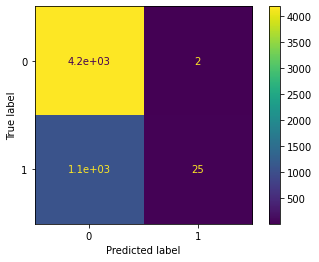

In [ ]:

#Label propogation
model = LabelSpreading()
model.fit(X_train_mixed,y_train_mixed)
#Obtaining the labels
tran_labels = model.transduction_
#Scaling the datasets
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train_mixed)
X_test_scale = scaler.fit_transform(X_test)
#Scaling the entire test data set
X_test_full_scale = scaler.fit_transform(test_arr_x)
#Fitting Classifier using the estimated labeled data 
model2 = LogisticRegression()
lr_lab_fit = model2.fit(X_train_scale,tran_labels)
yhat = lr_lab_fit.predict(X_test_scale)
score = accuracy_score(y_test_arr_nlab,yhat)
print("Prediction Score with limited test data=",score)
print("Result")
#Prediction For the entire test dataset (with the model fitted with 1601 elements as above w.r.t train data set size)
yhat_full = lr_lab_fit.predict(X_test_full_scale)
score_full = accuracy_score(test_arr_y,yhat_full)
print("Prediction score of the classifier=", score_full)
print("Confusion Matrix=\n", confusion_matrix(test_arr_y,yhat_full))
print("Classification Report=\n", classification_report(test_arr_y,yhat_full))
disp = plot_confusion_matrix(lr_lab_fit,X_test_full_scale,test_arr_y)
print(disp.confusion_matrix)



In [ ]:
print(X_train_scale.shape,train_arr_y.shape)

(3202, 17) (1601, 1)


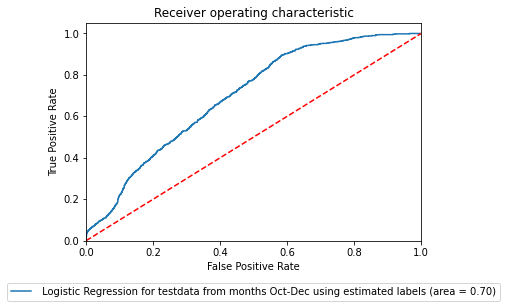

In [ ]:
probs = lr_lab_fit.predict_proba(X_test_full_scale)
preds_lr_lab_fit = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(test_arr_y, preds_lr_lab_fit)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=' Logistic Regression for testdata from months Oct-Dec using estimated labels (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.3),ncol=2)
plt.savefig('Log_ROC')
plt.show()

#Fitting Classifier using actual labels of test data from Oct-Dec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction Score with limited test data and actual labels= 0.8144909431605247
Result
Prediction score of the classifier with actual labels= 0.8196814562002275
Confusion Matrix=
 [[4138   45]
 [ 906  185]]
Classification Report=
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      4183
           1       0.80      0.17      0.28      1091

    accuracy                           0.82      5274
   macro avg       0.81      0.58      0.59      5274
weighted avg       0.82      0.82      0.77      5274

[[4138   45]
 [ 906  185]]


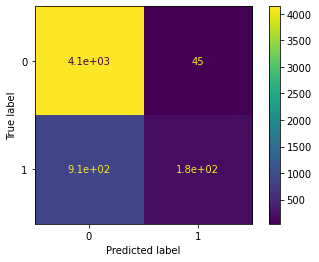

In [ ]:
#Fitting Classifier using the actual labeled data 
model3 = LogisticRegression()
lr_act_fit = model3.fit(X_train_scale, y_train_act_mixed)
yhat_act = lr_act_fit.predict(X_test_scale)
score_act = accuracy_score(y_test_arr_nlab,yhat_act)
print("Prediction Score with limited test data and actual labels=",score_act)
print("Result")
#Prediction For the entire test dataset (with the model fitted with 1601 elements as above w.r.t train data set size)
yhat_act_full = lr_act_fit.predict(X_test_full_scale)
score_act_full = accuracy_score(test_arr_y,yhat_act_full)
print("Prediction score of the classifier with actual labels=", score_act_full)
print("Confusion Matrix=\n", confusion_matrix(test_arr_y,yhat_act_full))
print("Classification Report=\n", classification_report(test_arr_y,yhat_act_full))
disp = plot_confusion_matrix(lr_act_fit,X_test_full_scale,test_arr_y)
print(disp.confusion_matrix)

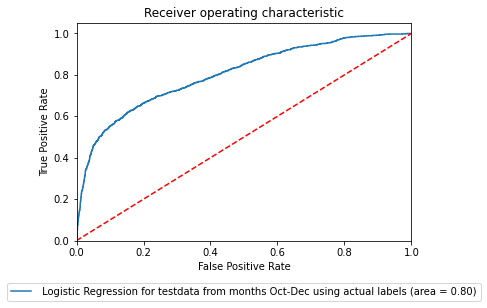

In [ ]:
probs = lr_act_fit.predict_proba(X_test_full_scale)
preds_lr_act_fit = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(test_arr_y, preds_lr_act_fit)
roc_auc_act = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=' Logistic Regression for testdata from months Oct-Dec using actual labels (area = %0.2f)' % roc_auc_act)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.3),ncol=2)
plt.savefig('Log_ROC')
plt.show()

#Report classification performance on Feb-March data set with and without the self-labelled data.

#Label Spreading (Semi-Supervised)

#For test dataset \# 2 : Feb-Mar

In [ ]:
# Label propogation for test dataset# 2

In [ ]:
rng = np.random.RandomState(2)
indices = np.arange(len(train_arr_x))
#Shuffling the elements 
rng.shuffle(indices)
X_train_mixed = np.concatenate((train_arr_x[indices],test2_arr_x[indices]))

y_test2_arr_nlab = test2_arr_y[indices] # y_test which is going to be unlabeled
no_label = np.full((len(indices),1),-1)
y_test2_arr_unlab = np.copy(no_label)
#y_test_arr_unlab = np.concatenate((y_test_arr_nlab[0:1000],no_label)) #1000 are labeled, 1000 are unlabeled
print(y_test2_arr_nlab.shape, no_label.shape,y_test2_arr_unlab.shape)

y_train_mixed = np.concatenate((train_arr_y[indices],y_test2_arr_unlab))
#contains all actual labels
y_train_act_mixed = np.concatenate((train_arr_y[indices],test2_arr_y[indices]))
print(X_train_mixed.shape,y_train_mixed.shape)
X_test2 = np.copy(test2_arr_x[indices])
print(np.unique(y_test2_arr_nlab))
print(X_test2.shape)

(1601, 1) (1601, 1) (1601, 1)
(3202, 17) (3202, 1)
[0 1]
(1601, 17)


#Label propogation and fitting classifier with test dataset \# 2 from Feb-Mar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


Prediction Score with limited test data set # 2= 0.9331667707682698
Result
Prediction score of the classifier= 0.9273075083692014
Confusion Matrix=
 [[1891    5]
 [ 147   48]]
Classification Report=
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1896
           1       0.91      0.25      0.39       195

    accuracy                           0.93      2091
   macro avg       0.92      0.62      0.67      2091
weighted avg       0.93      0.93      0.91      2091

[[1891    5]
 [ 147   48]]
Accuracy = 0.9273075083692014, Precision = 0.9056603773584906, Recall = 0.24615384615384617, F1-score = 0.3870967741935484


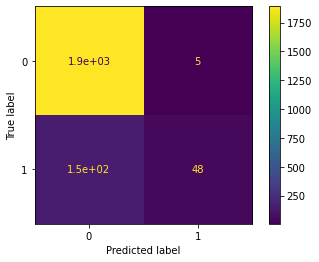

In [ ]:
#Label propogation
model4 = LabelSpreading()
model4.fit(X_train_mixed,y_train_mixed)
#Obtaining the labels
tran_labels = model4.transduction_
#Scaling the datasets
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train_mixed)
X_test2_scale = scaler.fit_transform(X_test2)
#Scaling the entire test data set
X_test2_full_scale = scaler.fit_transform(test2_arr_x)
#Fitting Classifier
model5 = LogisticRegression()
lr_lab_fit2 = model5.fit(X_train_scale,tran_labels)
yhat2 = lr_lab_fit2.predict(X_test2_scale)
score2 = accuracy_score(y_test2_arr_nlab,yhat2)
print("Prediction Score with limited test data set # 2=",score2)
print("Result")
#Prediction For the entire test dataset # 2 (with the model fitted with 1601 elements as above w.r.t train data set size)
yhat2_full = lr_lab_fit2.predict(X_test2_full_scale)
score2_full = accuracy_score(test2_arr_y,yhat2_full)
print("Prediction score of the classifier=", score2_full)
print("Confusion Matrix=\n", confusion_matrix(test2_arr_y,yhat2_full))
print("Classification Report=\n", classification_report(test2_arr_y,yhat2_full))
disp2 = plot_confusion_matrix(lr_lab_fit2,X_test2_full_scale,test2_arr_y)
print(disp2.confusion_matrix)
acc   = accuracy(test2_arr_y, yhat2_full)
rec   = recall(test2_arr_y, yhat2_full)
prec  = precision(test2_arr_y, yhat2_full)
f1    = f1_score(test2_arr_y, yhat2_full)
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')


In [ ]:
print(X_train_scale.shape,test2_arr_y.shape)

(3202, 17) (2091, 1)


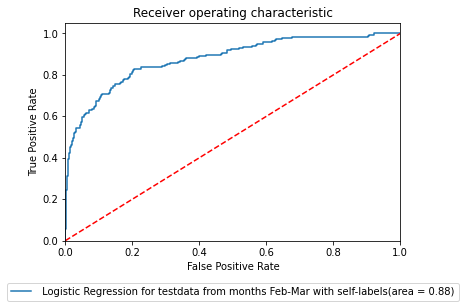

In [ ]:
probs = lr_lab_fit2.predict_proba(X_test2_full_scale)
preds_lr_lab_fit2 = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(test2_arr_y, preds_lr_lab_fit2)
roc_auc2 = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=' Logistic Regression for testdata from months Feb-Mar with self-labels(area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.3),ncol=2)
plt.savefig('Log_ROC')
plt.show()

#Fitting Classifier using actual labels of test data from Feb-Mar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction Score with limited test data and actual labels= 0.9375390381011868
Result
Prediction score of the classifier with actual labels= 0.9301769488283118
Confusion Matrix=
 [[1881   15]
 [ 131   64]]
Classification Report=
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1896
           1       0.81      0.33      0.47       195

    accuracy                           0.93      2091
   macro avg       0.87      0.66      0.71      2091
weighted avg       0.92      0.93      0.92      2091

[[1881   15]
 [ 131   64]]


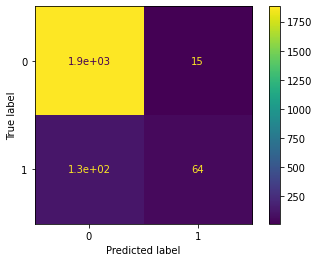

In [ ]:
#Fitting Classifier using the actual labeled data 
model6 = LogisticRegression()
lr_act_fit2 = model6.fit(X_train_scale, y_train_act_mixed)
yhat2_act = lr_act_fit2.predict(X_test2_scale)
score2_act = accuracy_score(y_test2_arr_nlab,yhat2_act)
print("Prediction Score with limited test data and actual labels=",score2_act)
print("Result")
#Prediction For the entire test dataset (with the model fitted with 1601 elements as above w.r.t train data set size)
yhat2_act_full = lr_act_fit2.predict(X_test2_full_scale)
score2_act_full = accuracy_score(test2_arr_y,yhat2_act_full)
print("Prediction score of the classifier with actual labels=", score2_act_full)
print("Confusion Matrix=\n", confusion_matrix(test2_arr_y,yhat2_act_full))
print("Classification Report=\n", classification_report(test2_arr_y,yhat2_act_full))
disp = plot_confusion_matrix(lr_act_fit2,X_test2_full_scale,test2_arr_y)
print(disp.confusion_matrix)

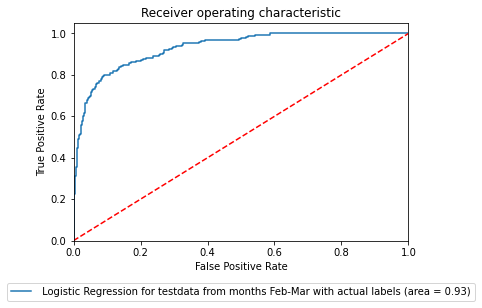

In [ ]:
probs = lr_act_fit2.predict_proba(X_test2_full_scale)
preds_lr_act_fit2 = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(test2_arr_y, preds_lr_act_fit2)
roc_auc2_act = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=' Logistic Regression for testdata from months Feb-Mar with actual labels (area = %0.2f)' % roc_auc2_act)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.3),ncol=2)
plt.savefig('Log_ROC')
plt.show()

#Results

#Classification peformance on Feb-March dataset with self-labelled data and without self-labelled data i.e. with actual labels


In [ ]:
data = {
    'accuracy': [accuracy(test2_arr_y, yhat2_full),accuracy(test2_arr_y, yhat2_act_full) ],
    'precision': [precision(test2_arr_y, yhat2_full),precision(test2_arr_y, yhat2_act_full) ],
    'recall': [ recall(test2_arr_y, yhat2_full), recall(test2_arr_y, yhat2_act_full)],
    'f1 score': [f1_score(test2_arr_y, yhat2_full),f1_score(test2_arr_y, yhat2_act_full) ],
    'roc_auc': [roc_auc2,roc_auc2_act]
}

print("Results: Feb-March dataset with vs without self-labels i.e.actual labels")
pd.DataFrame.from_dict(data, orient='index', columns=['self-labeled','actual labels'])

Results: Feb-March dataset with vs without self-labels i.e.actual labels


,self-labeled,actual labels
accuracy,0.927308,0.930177
precision,0.905660,0.810127
recall,0.246154,0.328205
f1 score,0.387097,0.467153
roc_auc,0.878062,0.929750


#The classification performance on Feb-March data set with self-labeling is not worse compared to without self-labeling i.e. with self-labels, the roc_auc score is 87% whereas with actual labels it is 93% => the classifier performs reasonably well and is only 5 % worse with self-labeled data.

#Classification peformance on Oct-Dec dataset with self-labelled data and without self-labelled data i.e. with actual labels

In [ ]:
data = {
    'accuracy': [accuracy(test_arr_y, yhat_full),accuracy(test_arr_y, yhat_act_full) ],
    'precision': [precision(test_arr_y, yhat_full),precision(test_arr_y, yhat_act_full) ],
    'recall': [ recall(test_arr_y, yhat_full), recall(test_arr_y, yhat_act_full)],
    'f1 score': [f1_score(test_arr_y, yhat_full),f1_score(test_arr_y, yhat_act_full) ],
    'roc_auc': [roc_auc,roc_auc_act]
}

print("Results: Oct-Dec dataset with vs without self-labels i.e.actual labels")
pd.DataFrame.from_dict(data, orient='index', columns=['self-labeled','actual labels'])

Results: Oct-Dec dataset with vs without self-labels i.e.actual labels


,self-labeled,actual labels
accuracy,0.797497,0.819681
precision,0.925926,0.804348
recall,0.022915,0.169569
f1 score,0.044723,0.280091
roc_auc,0.697132,0.802893


#The classification performance on Oct-Dec test data set with self-labeling is worse compared to without self-labeling i.e. with self-labels, the roc_auc score is 69.7% whereas with actual labels it is 80% => the classifier with self-labels performs not that well but then with actual labels the classifier doesn't peform exceedingly as well. 